In [10]:
from random import random
from matplotlib import pyplot as plt

import numpy as np
import torch
from torch.optim import Adam
from torch.utils.data import DataLoader

from IntelliStat.datasets import Dataset

In [11]:
class ENN:
    def __init__ (self):
        self.model = torch.nn.Sequential(
            torch.nn.Linear(1,5),
            torch.nn.ReLU(),
            torch.nn.Linear(5,1)
        )
        self.optimizer = Adam(self.model.parameters(), lr = 0.001)

    def train_step(self, x, y, criterion):
        self.model.zero_grad()
        x = x.float()
        y = y.float()
        x = x.view(-1,1)
        y = y.view(-1,1)
        output = self.model(x)
        loss = criterion(output, y)
        loss.backward()
        self.optimizer.step()

    def train(self, data, epochs, batch):
        data_train = DataLoader(dataset = data, batch_size = batch, shuffle = True)
        criterion = torch.nn.MSELoss()
        for epoch in range(epochs):
            for dummy, batch in enumerate(data_train):
                x_train, y_train = batch['input'], batch['output']
                self.train_step(x_train, y_train, criterion)


In [12]:
def main():
    EvolutionalNN = ENN()

    X_data = [not_biased_x_point + 3 * (random() - 0.5) for not_biased_x_point in range(50)]

    Y_data = [ (2 * x_point  + 2 + 10 * (random() - 0.5) ) for x_point in X_data]

    X_tensor = [[x] for x in X_data]
    X_tensor = torch.tensor(X_tensor)
    X_data = np.array(X_data, dtype=np.float32)
    Y_data = np.array(Y_data, dtype=np.float32)
    Y = X_data * 2 + 2
    dataset = Dataset(X_data, Y)
    EvolutionalNN.train(dataset, 200, 5 )


    Y_NN = EvolutionalNN.model(X_tensor)
    Y_NN = Y_NN.detach().numpy()

    fig, ax = plt.subplots()
    ax.plot(X_data, Y_data, 'ko', label = "Data points")
    ax.plot(X_data, Y_NN, 'blue', label = "Evolutional NN")
    ax.legend(loc='upper left', prop={'size': 7})
    plt.show()


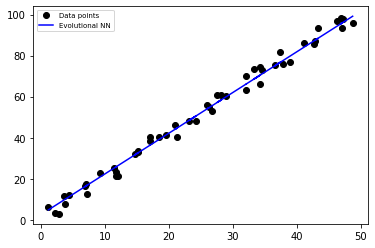

In [13]:
if __name__ == "__main__" :
    main()